## Introduction To Scikit-Learn (SKLearn)
This notebook demonstrates some of the most useful functions of the beautiful scikit-learn library.

What to cover:
0. An end-to-end scikit-learn workflow.
1. Getting the data ready.
2. Choosing the right estimator/algorithm for the problem.
3. Fit the model/algorithm and use it to make the right predictions on our data.
4. Evaluating a model
5. Improve a model
6. Save and Load the trained model
7. Putting all together.

## 0. An end-to-end Scikit-Learn.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd

In [2]:
# Get the data ready
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create X (features matrix)
X = heart_disease.drop('target', axis=1)

# Create y (labels)
y = heart_disease['target']

In [4]:
# Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# Keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 2. Fit the model to the training data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
clf.fit(X_train, y_train);

In [7]:
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1])

In [8]:
y_test

175    0
218    0
58     1
283    0
207    0
      ..
187    0
74     1
263    0
38     1
48     1
Name: target, Length: 61, dtype: int64

In [9]:
# 3. Evaluate the Model
clf.score(X_train, y_train)

1.0

In [10]:
clf.score(X_test, y_test)

0.7540983606557377

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.66      0.72        29
           1       0.73      0.84      0.78        32

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [12]:
confusion_matrix(y_test, y_preds)

array([[19, 10],
       [ 5, 27]])

In [13]:
accuracy_score(y_test, y_preds)

0.7540983606557377

In [14]:
# 4. Improve a Model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100}%")
    print('')

Trying model with 10 estimators
Model accuracy on test set: 75.40983606557377%

Trying model with 20 estimators
Model accuracy on test set: 80.32786885245902%

Trying model with 30 estimators
Model accuracy on test set: 77.04918032786885%

Trying model with 40 estimators
Model accuracy on test set: 77.04918032786885%

Trying model with 50 estimators
Model accuracy on test set: 77.04918032786885%

Trying model with 60 estimators
Model accuracy on test set: 77.04918032786885%

Trying model with 70 estimators
Model accuracy on test set: 77.04918032786885%

Trying model with 80 estimators
Model accuracy on test set: 77.04918032786885%

Trying model with 90 estimators
Model accuracy on test set: 77.04918032786885%



In [15]:
# 5. Save the model and load it 
import pickle
pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [16]:
loaded_model = pickle.load(open('random_forest_model_1.pkl', 'rb'))
loaded_model.score(X_test, y_test)

0.7704918032786885

## Getting our data ready to be used with machine learning
The three main things are:
    1. Split the data into features and labels (usually `X` & `y`)
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [17]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
X = heart_disease.drop('target', axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [20]:
# 1. Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## 1.1 Make sure it's all numerical

In [22]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [23]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [24]:
# Split the data into X/y
X = car_sales.drop('Price', axis=1)
y= car_sales['Price']

# Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
# Build a machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Toyota'

In [ ]:
car_sales["Doors"].value_counts()

In [ ]:
# Turn data from categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

In [ ]:
X.head()

In [ ]:
pd.DataFrame(transformed_X)

In [ ]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

In [ ]:
# Let's refit our model
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

### What if there were missing data?
1. Fill them with some values (also known as imputation)
2. Remove the samples with missing data altogether.

In [ ]:
# Import car sales missing data
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing.isna().sum()
car_sales_missing.dtypes

In [ ]:
# Create X and y
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

### Option 1: Fill missing data with Pandas

In [ ]:
car_sales_missing.head()

In [ ]:
car_sales_missing.dtypes

In [ ]:
car_sales_missing = car_sales_missing.fillna({
    'Make': 'missing',
    'Colour': 'missing',
    'Odometer (KM)': car_sales_missing['Odometer (KM)'].mean(),
    'Doors': 4
})

In [ ]:
# Check the data frame again
car_sales_missing.isna().sum()

In [ ]:
# Remove the rows with missing Price values
car_sales_missing = car_sales_missing.dropna(subset=['Price'])

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
len(car_sales_missing)

In [ ]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [ ]:
# Turn data into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

### Option 2: Fill the missing data with Scikit-Learn

In [ ]:
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing.isna().sum()

In [ ]:
# Drop the rows with no values
car_sales_missing = car_sales_missing.dropna(subset=['Price'])
car_sales_missing.isna().sum()

In [ ]:
# Split data into X and y
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [ ]:
# Fill missing data with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill the categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns
cat_feature = ["Make", "Colour"]
door_feature = ['Doors']
num_feature = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_feature),
    ('door_imputer', door_imputer, door_feature),
    ('num_imputer', num_imputer, num_feature)
])

# Transform the Data
filled_X = imputer.fit_transform(X)
filled_X

In [ ]:
car_sales_filled = pd.DataFrame(filled_X, columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])

car_sales_filled

In [ ]:
car_sales_filled.isna().sum()

In [ ]:
# Turn data into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

In [ ]:
# Data as numbers and filled missing values
# Let us fit the model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

### Choosing the right estimator or algorithm for dataa

In [ ]:
# Import boston housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

In [ ]:
housing_df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
housing_df['target'] = housing['target']
housing_df.head()

In [ ]:
len(housing_df)

In [ ]:
# Try the Ridge 
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Ridge Model
model = Ridge()
model.fit(X_train, y_train)
          
# Check the score of the Ridge model on test data
model.score(X_test, y_test)

In [ ]:
# Trying the data with Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Ridge Model
rfg = RandomForestRegressor()
rfg.fit(X_train, y_train)
          
# Check the score of the Ridge model on test data
rfg.score(X_test, y_test)

In [ ]:
# Using LinearSVC on heart disease data set

# import estimator
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the estimator
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)

# Evaluate the estimator
lsvc.score(X_test, y_test)

In [ ]:
heart_disease['target'].value_counts()

In [ ]:
# Using Random Forest Classifier on heart disease data set

# import estimator
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the estimator
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the estimator
clf.score(X_test, y_test)

## Fitting a model/algorithm to the data to make predictions
#### `X` = features, feature variables, data
#### `y` = labels, targets, target variables

In [ ]:
# Using Random Forest Classifier on heart disease data set

# import estimator
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the estimator
clf = RandomForestClassifier()

# Fit the model to data
clf.fit(X_train, y_train)

# Evaluate the estimator
clf.score(X_test, y_test)

In [ ]:
X_test.head()

In [ ]:
y.tail()

## 3.2 Make predictions using a machine learning model

 2 ways to make predictions:
 1. `predict()`
 2. `predict_proba()`

In [ ]:
X_test.head()

In [ ]:
# Use the trained model to make predictions
clf.predict(X_test)

In [ ]:
np.array(y_test)

In [ ]:
# Compare prediction to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

In [ ]:
# Make prediction with predict_proba which returns the probabilities of a classification label
clf.predict_proba(X_test[:5])

In [ ]:
# Predicting on the same data...
clf.predict(X_test[:5])

In [ ]:
heart_disease['target'].value_counts()

In [ ]:
X.head()

In [ ]:
housing_df.head()

In [ ]:
# import the models
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(42)

# Create data
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate model
model =  RandomForestRegressor().fit(X_train, y_train)

# Check the score of the model
y_preds = model.predict(X_test)

In [ ]:
y_preds[:10]

In [ ]:
np.array(y_test[:10])

In [ ]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

## Evaluating A Machine Learning Model
There are 3 ways to evaluate the machine learning model:
1. Estimator `score` method
2. The `scoring` parameter
3. `Problem-specific` metric functions

4.1 Evaluating ML model with `score` parameter

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

In [ ]:
clf.score(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
# import the models
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(42)

# Create data
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate model
model =  RandomForestRegressor().fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

## 4.2 Evaluating ML model with `scoring` method

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
cross_val_score(clf, X, y, cv=5)

In [ ]:
np.random.seed(42)

# Single training and test split test
clf_single_score = clf.score(X_test, y_test)

# Take mean of the 5-fold cross validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

### 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion metrics
4. Classification Report

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [28]:
np.mean(cross_val_score)

np.float64(0.8248087431693989)

In [29]:
print(f"Heart disease classifier accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart disease classifier accuracy: 82.48%


** ROC curve

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
from sklearn.metrics import roc_curve

clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [35]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
fpr[:10]

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552])

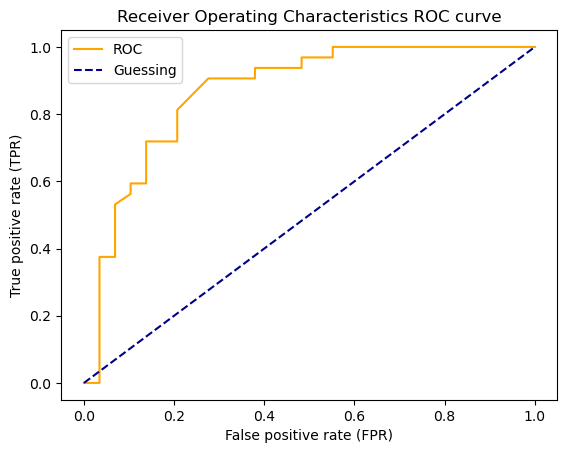

In [42]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')

    # Plot a line with no predictive power(baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', label='Guessing', linestyle='--')

    plt.xlabel('False positive rate (FPR)')
    plt.ylabel('True positive rate (TPR)')
    plt.title('Receiver Operating Characteristics ROC curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [43]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

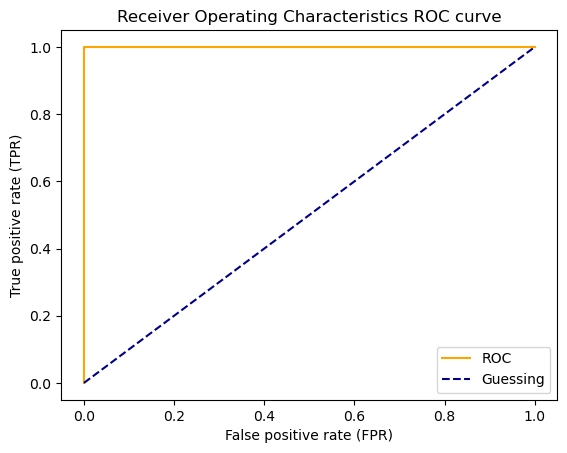

In [45]:
# Plot a perfect ROC curve and AUC score
fpr, tpr, threshold = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [46]:
roc_auc_score(y_test, y_test)

1.0

### Confusion Matrix

In [49]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [50]:
pd.crosstab(y_test, y_preds, rownames=['Actual Labels'], colnames=['Predicted'])

Predicted,0,1
Actual Labels,,
0,23,6
1,6,26


In [51]:
23 + 26 + 12

61

In [52]:
len(y_preds)

61

In [55]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Jupyter detected...
3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
    current version: 25.11.1
    latest version: 26.1.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [57]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


<Axes: >

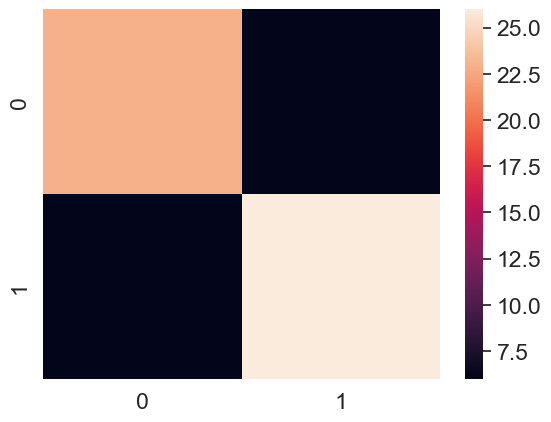

In [56]:
# Make confusion matrix with seaborn heatmap
import seaborn as sns

sns.set(font_scale=1.5)
conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat);